In [2]:
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

model = ChatGroq(model="llama-3.1-8b-instant")

model.invoke("Hello, how are you?")

d:\AgenticAI\Practice\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content="Hello, I'm functioning properly. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 41, 'total_tokens': 56, 'completion_time': 0.108241174, 'completion_tokens_details': None, 'prompt_time': 0.002083121, 'prompt_tokens_details': None, 'queue_time': 0.080977339, 'total_time': 0.110324295}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bc327-4c67-7ce2-a262-37e7036c5e3e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 15, 'total_tokens': 56})

## Python RAG Blob

In [3]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("../data/python-pdf.pdf")
documents = loader.load()

len(documents)


171

In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

chunks = text_splitter.split_documents(documents)

len(chunks)

345

In [5]:
from langchain_ollama import OllamaEmbeddings
from langchain_chroma import Chroma

embeddings = OllamaEmbeddings(model="nomic-embed-text")

pythondb = Chroma.from_documents(chunks, embeddings, persist_directory="./.python_db")

In [6]:
response = pythondb.similarity_search("What is Python?")
print(response)


[Document(id='74b67266-88f4-4e54-917b-0c405288c7c9', metadata={'producer': 'Adobe Photoshop for Macintosh -- Image Conversion Plug-in', 'page': 154, 'source': '../data/python-pdf.pdf', 'page_label': '155', 'total_pages': 171, 'creationdate': '2023-08-07T19:16:22+05:30', 'moddate': '2023-08-07T19:16:27+05:30', 'creator': 'PDF Presentation Adobe Photoshop'}, page_content="Answer: Django ORM (Object-Relational Mapping) is a feature that allows you to interact with your \ndatabase, like you would with SQL. It provides an abstraction layer by mapping database tables to \nPython classes and table rows to class instances, making it easier to work with databases in a more \nPythonic way. \n \nThink of Django ORM as an interpreter who translates between two languages: Python and SQL. You \ncommunicate with the interpreter in Python, a nd they translate your requests into SQL queries. This \nway, you don't have to learn SQL to work with databases efficiently. \n \nExample: \nHere's a simple exam

In [7]:
### Perform as Retriever

retrieval = pythondb.as_retriever()
retrieval

VectorStoreRetriever(tags=['Chroma', 'OllamaEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x0000018D7B14E3C0>, search_kwargs={})

In [8]:
retrieval.invoke("What is Python")

[Document(id='74b67266-88f4-4e54-917b-0c405288c7c9', metadata={'page_label': '155', 'creationdate': '2023-08-07T19:16:22+05:30', 'total_pages': 171, 'page': 154, 'source': '../data/python-pdf.pdf', 'creator': 'PDF Presentation Adobe Photoshop', 'moddate': '2023-08-07T19:16:27+05:30', 'producer': 'Adobe Photoshop for Macintosh -- Image Conversion Plug-in'}, page_content="Answer: Django ORM (Object-Relational Mapping) is a feature that allows you to interact with your \ndatabase, like you would with SQL. It provides an abstraction layer by mapping database tables to \nPython classes and table rows to class instances, making it easier to work with databases in a more \nPythonic way. \n \nThink of Django ORM as an interpreter who translates between two languages: Python and SQL. You \ncommunicate with the interpreter in Python, a nd they translate your requests into SQL queries. This \nway, you don't have to learn SQL to work with databases efficiently. \n \nExample: \nHere's a simple exam

In [ ]:
# from langchain_core.tools import create_retriever_tool

# python_retrieval_tool = create_retriever_tool(
#     retrieval,
#     "retrieve_python_data",
#     "Search and run information about Python"
# )

# python_retrieval_tool


StructuredTool(name='retrieve_python_data', description='Search and run information about Python', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x0000018D7B2398A0>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x0000018D7B23A160>)

In [23]:
from langchain_core.tools import tool

@tool
def retrieve_python_data(query: str):
    """Search information about Python"""
    return retrieval.invoke(query)


## Blob-->02 SQL BLOB

In [10]:
from langchain_community.document_loaders import PyPDFLoader

loader2 = PyPDFLoader("../data/sql.pdf")
documents2  = loader2.load()

len(documents2)


138

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter2 = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

chunks2 = text_splitter2.split_documents(documents2)

len(chunks2)

229

In [12]:
from langchain_ollama import OllamaEmbeddings
from langchain_chroma import Chroma

embeddings2 = OllamaEmbeddings(model="nomic-embed-text")

sqldb = Chroma.from_documents(chunks2, embeddings2, persist_directory="./.sql_db")

In [13]:
response = sqldb.similarity_search("What is subquery?")
print(response)

[Document(id='f9695a48-6b8c-47ed-b3a0-eafb5f423d1f', metadata={'source': '../data/sql.pdf', 'page_label': '79', 'creator': 'PyPDF', 'moddate': '2020-08-29T11:26:12+00:00', 'producer': 'www.ilovepdf.com', 'creationdate': '', 'total_pages': 138, 'page': 78}, page_content='THE CLERKS\n56.WAQTD DETAILS OF THE EMPLOYEES WORKING AS \nCLERK AND HIRED BEFORE ATLEST A SALESMAN \n57.WAQTD DETAILS OF EMPLOYEES WORKING IN \nACCOUNTING OR SALES DEPT \n58.WAQTD DEPARTMENT NAMES OF THE EMPOYEES WITH \nNAME SMITH , KING AND MILLER \n59.WAQTD DETAILS OF EMPLOYEES WORKING NEWYORK \nOR CHICAGO \n60.WAQTD EMP NAMES IF EMPLOYEES ARE HIRED AFTER \nALL THE EMPLOYEES OF DEPT 10 \nINSTAGRAM -  ( ro_sql_helpmate ) \nNESTED SUB QUERY :\n" A sub query written inside a sub query is known as Nested Subquery " \nSAL \n1000\nWE CAN NEST ABOUT 255 SUB QUERIES ➢\n   New Section 1 Page 5'), Document(id='e43a1f1a-6233-4508-9f89-a7e39923cdf6', metadata={'creator': 'PyPDF', 'moddate': '2020-08-29T11:26:12+00:00', 'producer

In [14]:
### Perform as Retriever

sql_retrieval = sqldb.as_retriever()
sql_retrieval

VectorStoreRetriever(tags=['Chroma', 'OllamaEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x0000018D7B208A50>, search_kwargs={})

In [15]:
sql_retrieval.invoke("What is subquery?")

[Document(id='f9695a48-6b8c-47ed-b3a0-eafb5f423d1f', metadata={'producer': 'www.ilovepdf.com', 'moddate': '2020-08-29T11:26:12+00:00', 'source': '../data/sql.pdf', 'creator': 'PyPDF', 'creationdate': '', 'page': 78, 'total_pages': 138, 'page_label': '79'}, page_content='THE CLERKS\n56.WAQTD DETAILS OF THE EMPLOYEES WORKING AS \nCLERK AND HIRED BEFORE ATLEST A SALESMAN \n57.WAQTD DETAILS OF EMPLOYEES WORKING IN \nACCOUNTING OR SALES DEPT \n58.WAQTD DEPARTMENT NAMES OF THE EMPOYEES WITH \nNAME SMITH , KING AND MILLER \n59.WAQTD DETAILS OF EMPLOYEES WORKING NEWYORK \nOR CHICAGO \n60.WAQTD EMP NAMES IF EMPLOYEES ARE HIRED AFTER \nALL THE EMPLOYEES OF DEPT 10 \nINSTAGRAM -  ( ro_sql_helpmate ) \nNESTED SUB QUERY :\n" A sub query written inside a sub query is known as Nested Subquery " \nSAL \n1000\nWE CAN NEST ABOUT 255 SUB QUERIES ➢\n   New Section 1 Page 5'),
 Document(id='e43a1f1a-6233-4508-9f89-a7e39923cdf6', metadata={'moddate': '2020-08-29T11:26:12+00:00', 'page_label': '79', 'page': 

In [ ]:
# from langchain_core.tools import create_retriever_tool

# sql_retrieval_tool = create_retriever_tool(
#     retrieval,
#     "retrieve_data_from_store_db",
#     "Search and run information about SQL"
# )

# sql_retrieval_tool


StructuredTool(name='retrieve_data_from_store_db', description='Search and run information about SQL', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x0000018D77CB7F60>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x0000018D79248220>)

In [24]:
@tool
def retrieve_sql_data(query: str):
    """Search information about SQL"""
    return retrieval.invoke(query)


In [25]:
tools = [retrieve_python_data,retrieve_sql_data]
tools

[StructuredTool(name='retrieve_python_data', description='Search information about Python', args_schema=<class 'langchain_core.utils.pydantic.retrieve_python_data'>, func=<function retrieve_python_data at 0x0000018D7F204E00>),
 StructuredTool(name='retrieve_sql_data', description='Search information about SQL', args_schema=<class 'langchain_core.utils.pydantic.retrieve_sql_data'>, func=<function retrieve_sql_data at 0x0000018D7F205760>)]

In [26]:
model_tools = model.bind_tools(tools)
model_tools

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000018D58136660>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000018D58137380>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'retrieve_python_data', 'description': 'Search information about Python', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'retrieve_sql_data', 'description': 'Search information about SQL', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object

In [27]:
from typing import TypedDict,Annotated
from langgraph.graph import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]


In [28]:
def ragBot(state: State):
    print("Rag Bot Node has been Called")
    return {"messages":[model_tools.invoke(state["messages"])]}

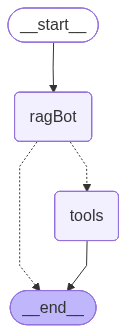

In [31]:
from IPython.display import display,Image
from langgraph.graph import START,StateGraph,END
from langgraph.prebuilt import ToolNode,tools_condition

#Define the Graph
graph = StateGraph(State)

## Add Nodes
graph.add_node("ragBot",ragBot)
graph.add_node("tools",ToolNode(tools))

## Add Edges
graph.add_edge(START,"ragBot")
graph.add_conditional_edges(
    "ragBot",
    tools_condition
)
graph.add_edge("ragBot","tools")
graph.add_edge("tools",END)

## Compile the Graph
graph_builder = graph.compile()

## Run the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [32]:
graph_builder.invoke(
    {
        "messages": [
            {"role": "user", "content": "What is Python"}
        ]
    }
)


Rag Bot Node has been Called


{'messages': [HumanMessage(content='What is Python', additional_kwargs={}, response_metadata={}, id='50fabd93-ad44-45b0-a33f-5d39e31229aa'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cxwd2qgey', 'function': {'arguments': '{"query":"What is Python?"}', 'name': 'retrieve_python_data'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 262, 'total_tokens': 280, 'completion_time': 0.023878629, 'completion_tokens_details': None, 'prompt_time': 0.016667785, 'prompt_tokens_details': None, 'queue_time': 0.050189615, 'total_time': 0.040546414}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bc32f-f542-7d50-a426-af96f34ce1c3-0', tool_calls=[{'name': 'retrieve_python_data', 'args': {'query': 'What is Python?'}, 'id': 'cxwd2qgey', 'type': 'tool_call'}], invalid_tool_calls=[], u

#### Print Only Content

In [ ]:
from IPython.display import display
import ipywidgets as widgets

content_box = widgets.Output()
metadata_box = widgets.Output()

with content_box:
    for doc in documents:
        print(doc.page_content)
        print("----")

with metadata_box:
    for doc in documents:
        print(doc.metadata)
        print("----")

tabs = widgets.Tab(children=[content_box, metadata_box])
tabs.set_title(0, "Content")
tabs.set_title(1, "Metadata")

display(tabs)
